# Mushroom Dataset Classification Problem

Mushroom Data Description:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### We have to find out if the Mushroom Species is edible or it is Poisonous.

#### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers and classifying the Mushroom Categories

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, power_transform, StandardScaler

After importing all the needed Libraries we are good to go with Data Importation Using Pandas

In [2]:
#Importing Dataset from local Directory using Pandas.read_csv() and storing it in a variable
ds = pd.read_csv('~/Desktop/Mushroom Practice Project/mushrooms.csv')

In [3]:
#importation is completed and the datasets is stored in ds variable
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


From above code we came to know that the dataset has been imported in 'ds' variable of Pandas Dataframe

In [4]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


By using ds.head() we can see first 5 rows of the whole datasets we can view more number of rows by using ds.head(10) or ds.head(20) or any number inside head()

In [5]:
#By using this code we came to know the dimension of the dataset
ds.shape

(8124, 23)

In [6]:
r,c = ds.shape
print("The total number of rows in dataset is {} and total number of columns is {}".format(r,c))

The total number of rows in dataset is 8124 and total number of columns is 23


### As we know that the model cannot interpret String so we will do label encoding so all the string value changes to Integer and we can easily carry out the EDA process

In [7]:
le = LabelEncoder()

In [8]:
le = ds.apply(le.fit_transform)

In [9]:
le.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here we have successfully converted the dataset in integer format by using label encoder and now we will save this to a variable le and later change it to our Primary variable ds

In [10]:
#Here we changed the label encoded data from our temp variable to our Primary varibale ds
ds = le

In [11]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


As we have converted the dataset in integer format now we can easily findout the relation between all the columns easily and do the data cleaning and all the other process

In [12]:
#Here we use ds.columns to find all the column names we can also use ds.keys
ds.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Now we will find is there any missing values in the dataset if present we will fix it through mean,median, mode after finding out the outliers

In [13]:
#By Using ds.info we came to know about many more things about the datasets like the size, range, datatype, memory usage, count of data and many more
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

Now we will find out some stastical description about the data by using ds.describe() by using this we will be able to know if the dataset is having some outlier or not and what is the mean, median, mode 1st quartile, 2nd quartile, 3rd quartile, Standart Deviation of the dataset

In [14]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


As there is very little difference between teh mean and Standard Deviation we have less number of outliers in the dataset

In [15]:
#by using ds.isnull().sum() we can find which columns has the missing values
ds.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

By looking at above tab we came to know that the dataset doesn't contain any missing values in any of the column lets give it a visualization look using seaborn.heatmap()

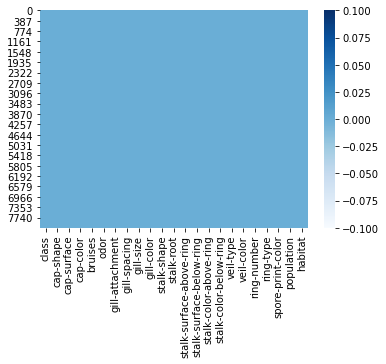

In [16]:
#By using this we will able to find out a visual representation of missing values in dataset cmap is nothing but the color scheme we want to give to the visual representation
sns.heatmap(ds.isnull(), cmap='Blues')

By looking at above graph we came to know that the columns has zero missing values heatmap is Multivariate Graphical Representation

## Now we will Start with EDA process 

In [17]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here we will be using sns.countplot to know how many mushroom are poisonous (1), how many are edible (0)

[Text(0, 0.5, 'Number of Instances'),
 Text(0.5, 0, 'Count of Mushrooms 0 is edible 1 is poisonous')]

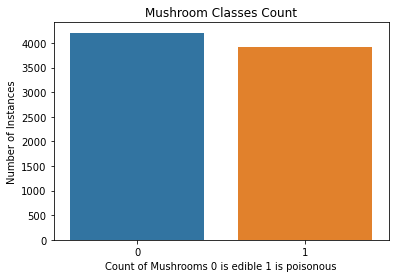

In [18]:
e, p = ds['class'].value_counts()
plt.title('Mushroom Classes Count')
ax = sns.countplot(ds['class'])
ax.set(xlabel="Count of Mushrooms 0 is edible 1 is poisonous", ylabel = "Number of Instances")

In [19]:
print('The total Number of edible Mushrooms are {}, and Poisonous Mushrooms are {}'.format(e,p))

The total Number of edible Mushrooms are 4208, and Poisonous Mushrooms are 3916


In [20]:
ep = e/r*100
pp = p/r*100
print('The percentage of edible mushroom in dataset is {:.2f}% and for poisonous it is {:.2f}% '.format(ep,pp))

The percentage of edible mushroom in dataset is 51.80% and for poisonous it is 48.20% 


### Now we will find the correlation between all the columns to see which column as high and which column has low correlation

In [21]:
#by using ds.corr() we can find out the correlation later we will display correlation using sns.heatmap
ds.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


### As we can see that column name veil type has no corelation we the dataset we will remove the veil type for the dataset

In [22]:
#By using this we have removed veil type as it was not helping us to classify the dataset
del ds['veil-type']

In [23]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


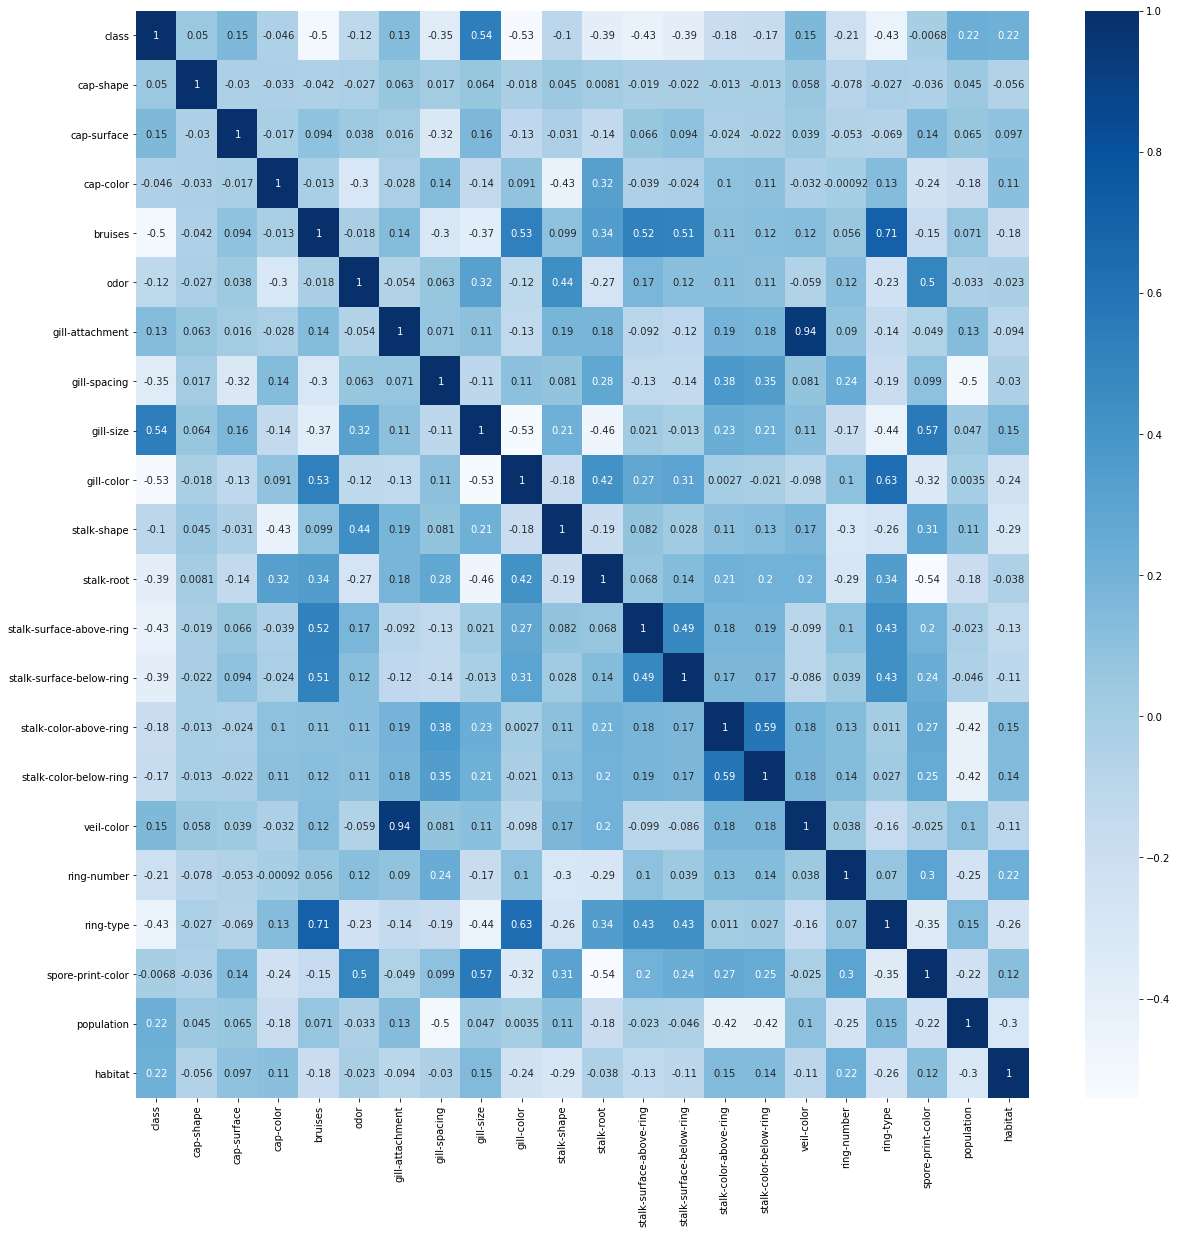

In [24]:
#Now we will do a graphical representation of Correlation using Seaborn.heatmap() in correlation we have two methods spearman and pearson
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(method='spearman'), cmap='Blues', annot=True)

By looking at the above graph we came to know which columns has positive correlation and which columns have negative correlation

## Now we will perform more Graphical Representation to understand the datamore

In [25]:
ds.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

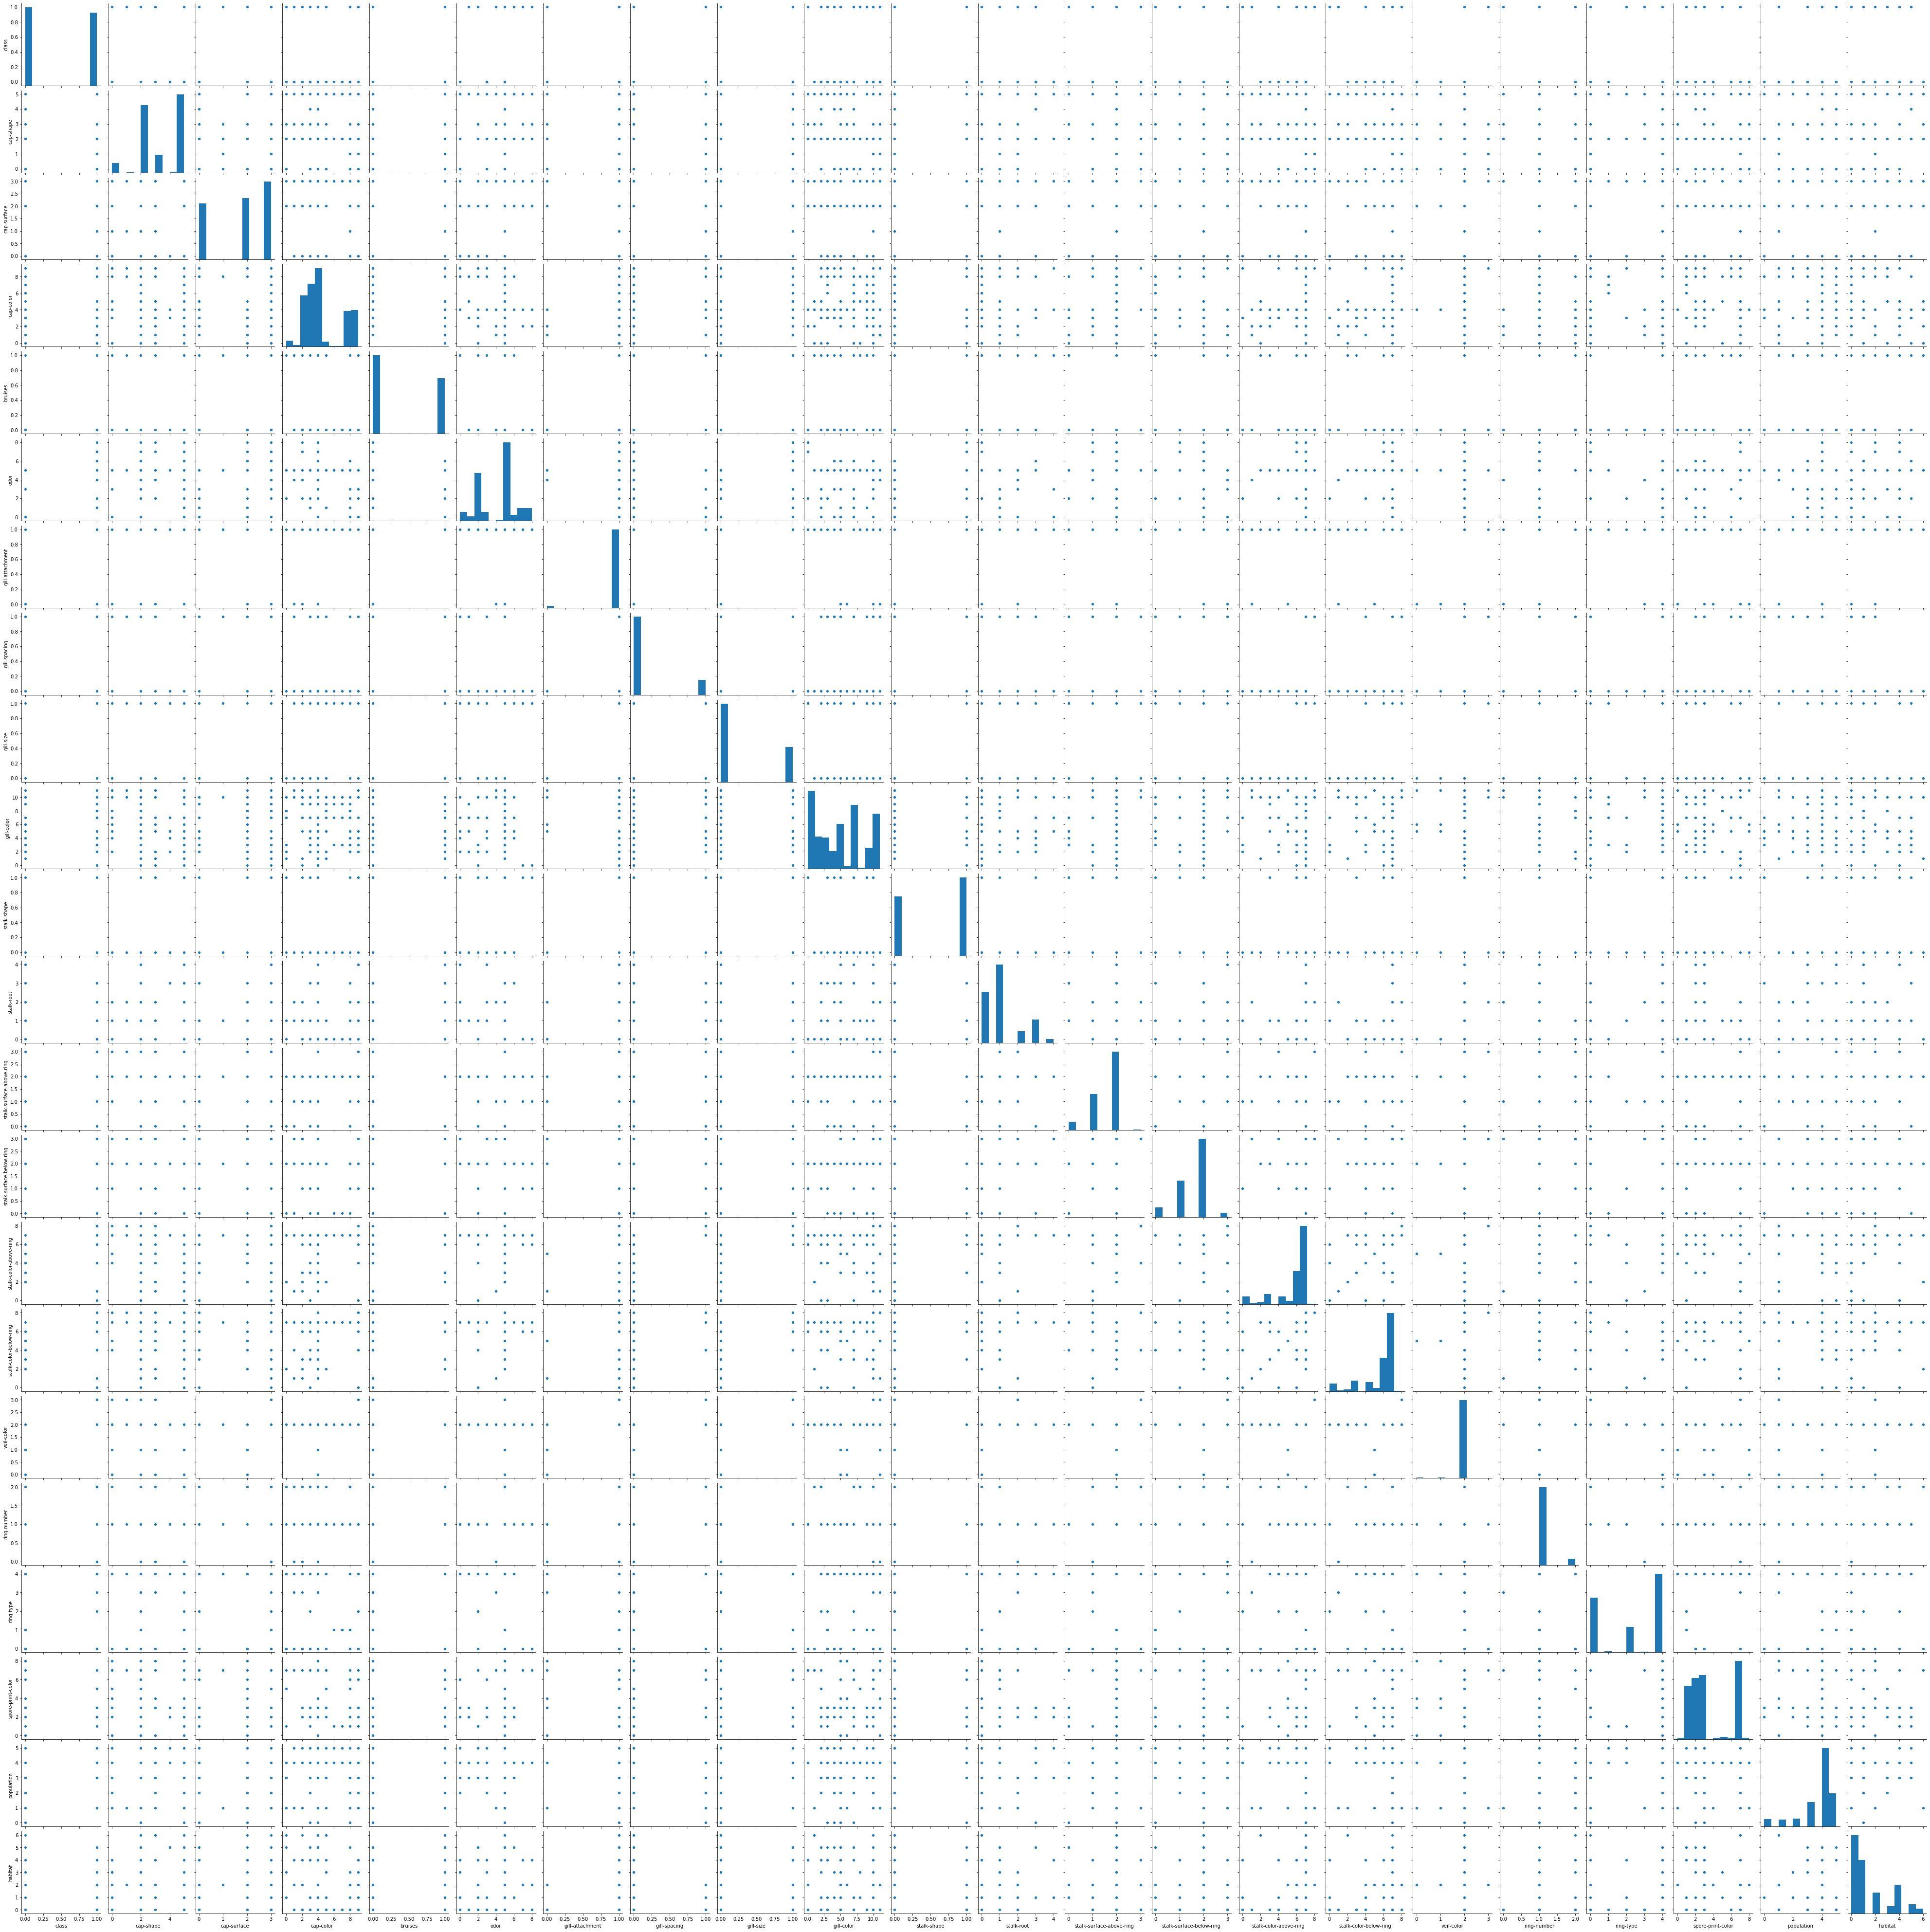

In [26]:
#By using pairplot we will come to know more about the dataset
sns.pairplot(ds)

In [27]:
ds.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

Now we will see if the dataset is skewed or not by using density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1345d7f10>,
      dtype=object)

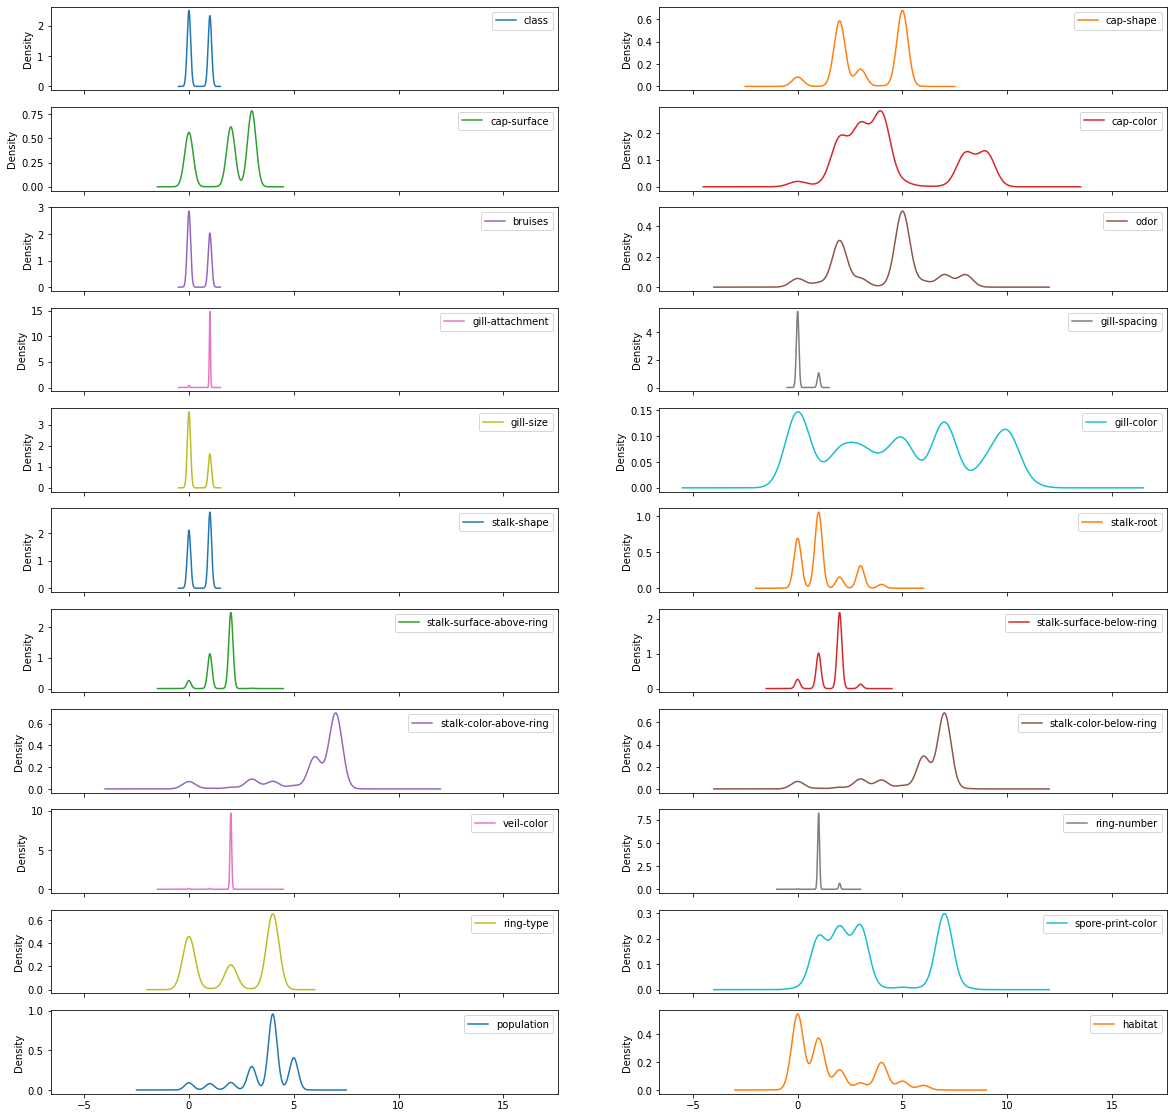

In [28]:
ds.plot(kind='kde', subplots=True, figsize=(20,20), layout=(11,2))

By looking at above density plot we can see that some column of the data are skewed we should fix those skewed columns to get better accuracy score.

Now we will see numeric value of skewness in each and every columns

In [29]:
ds.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [30]:
#by using power transformation we are reducing the skewness of the data
dsnew = power_transform(ds)
dsnew = pd.DataFrame(dsnew, columns = ds.columns)
dsnew.skew()

class                       0.071946
cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

Skewness Visualization

In [31]:
column = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

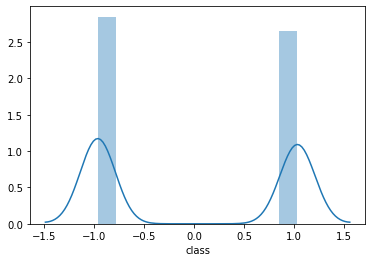

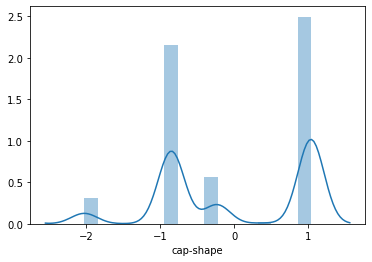

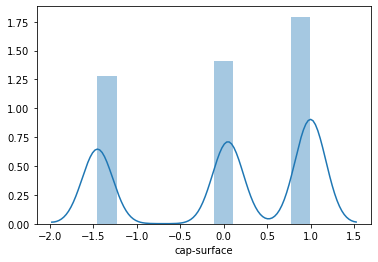

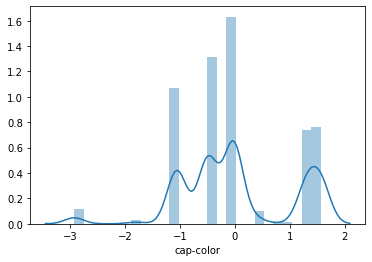

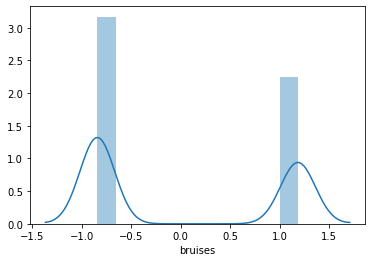

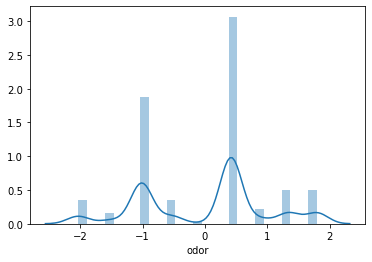

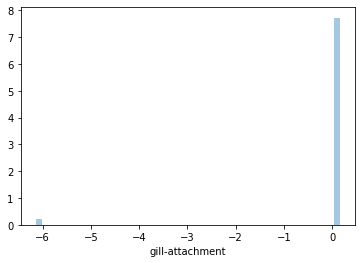

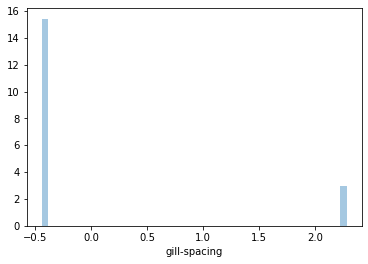

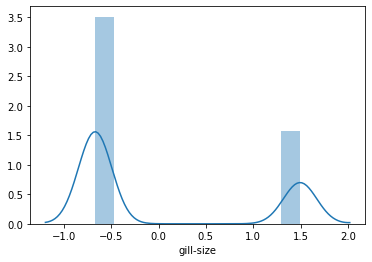

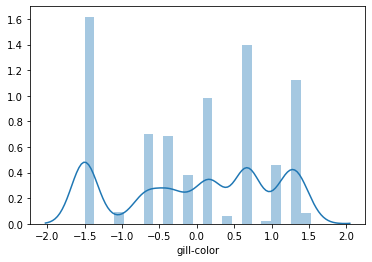

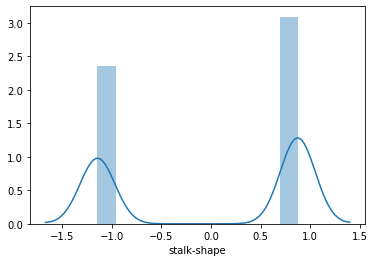

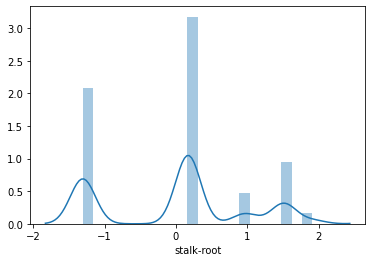

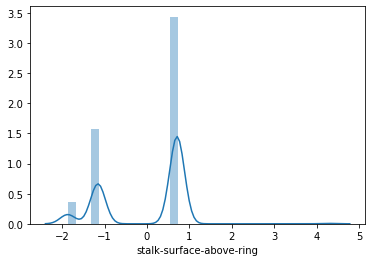

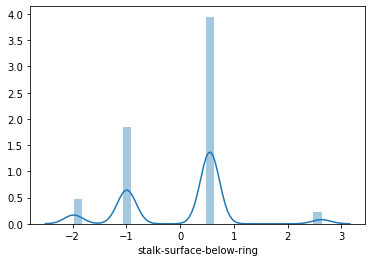

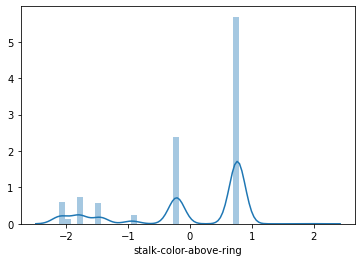

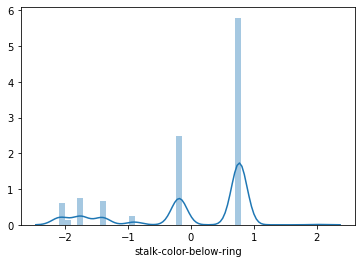

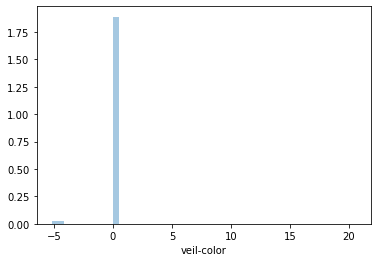

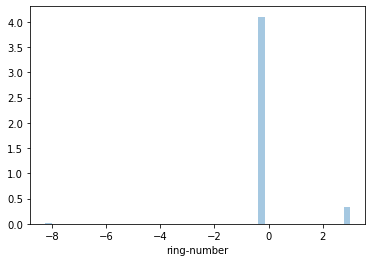

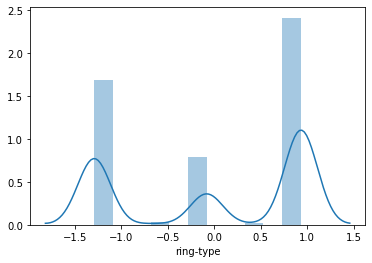

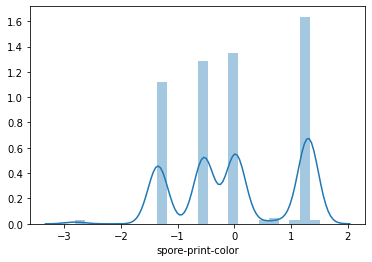

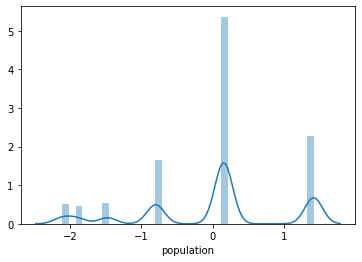

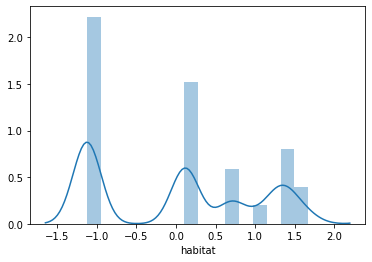

In [32]:
for i in column:
    plt.figure()
    sns.distplot(dsnew[i])

In [33]:
dsnew = ds
ds.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

## Here we started with spliting the dataset in two parts dependent and independent

In [34]:
X = ds.iloc[:,1:]

In [35]:
Y = ds.iloc[:,0]

Here we will standardize the independent columns

In [36]:
SC = StandardScaler()

In [37]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [38]:
X = pd.DataFrame(SC.fit_transform(X), columns=X.columns)

## We are looping random state from 1 to 200 to findout the best random state for our model

In [39]:
maxacc = 0 
maxrs = 0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, Y_train)
    rfc.score(X_train, Y_train)
    predrfc = rfc.predict(X_test)
    acc = accuracy_score(Y_test, predrfc)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print("Max Accuracy is", maxacc, "at random_state", maxrs)

Max Accuracy is 1.0 at random_state 1


Here we find out best accuracy as 100% at random state 1

Now we will add randomstate as 1 in all the algorithms for best accuracy score

In [40]:
#here we write all the model name so we can run all the model and find out which is best
model = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), AdaBoostClassifier(), GaussianNB(), KNeighborsClassifier()]

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [42]:
for m in model:
    print("Model Name is ", m)
    m.fit(X_train, Y_train)
    print("Score Before Predection")
    m.score(X_train, Y_train)
    pred = m.predict(X_test)
    print("Accuracy Score is", accuracy_score(Y_test, pred))
    print("Classification Report", classification_report(Y_test, pred))
    print("Confusion Matrix", confusion_matrix(Y_test, pred))

Model Name is  LogisticRegression()
Score Before Predection
Accuracy Score is 0.9526153846153846
Classification Report               precision    recall  f1-score   support

           0       0.95      0.96      0.95       820
           1       0.96      0.95      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix [[787  33]
 [ 44 761]]
Model Name is  SVC()
Score Before Predection
Accuracy Score is 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]
Model Name is  RandomForestClassifier()
Score Before Prede

## Here we are applying different different alorithm to check the accuracy score

In [43]:
lr = LogisticRegression()
rfc= RandomForestClassifier()
dtc =DecisionTreeClassifier()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier()
adb = AdaBoostClassifier()

In [44]:
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predlr))
print("Classification Report", classification_report(Y_test, predlr))
print("Confusion Matrix", confusion_matrix(Y_test, predlr))

Accuracy Score 0.9526153846153846
Classification Report               precision    recall  f1-score   support

           0       0.95      0.96      0.95       820
           1       0.96      0.95      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix [[787  33]
 [ 44 761]]


In [45]:
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predrfc))
print("Classification Report", classification_report(Y_test, predrfc))
print("Confusion Matrix", confusion_matrix(Y_test, predrfc))

Accuracy Score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]


In [46]:
dtc.fit(X_train, Y_train)
preddtc = dtc.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,preddtc))
print("Classification Report", classification_report(Y_test, preddtc))
print("Confusion Matrix", confusion_matrix(Y_test, preddtc))

Accuracy Score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]


In [47]:
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predsvc))
print("Classification Report", classification_report(Y_test, predsvc))
print("Confusion Matrix", confusion_matrix(Y_test, predsvc))

Accuracy Score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]


In [48]:
gnb.fit(X_train, Y_train)
predgnb= gnb.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predgnb))
print("Classification Report", classification_report(Y_test, predgnb))
print("Confusion Matrix", confusion_matrix(Y_test, predgnb))

Accuracy Score 0.9163076923076923
Classification Report               precision    recall  f1-score   support

           0       0.92      0.92      0.92       820
           1       0.92      0.91      0.92       805

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Confusion Matrix [[753  67]
 [ 69 736]]


In [49]:
knn.fit(X_train, Y_train)
predknn= knn.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predknn))
print("Classification Report", classification_report(Y_test, predknn))
print("Confusion Matrix", confusion_matrix(Y_test, predknn))

Accuracy Score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]


In [50]:
adb.fit(X_train, Y_train)
predadb= adb.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test,predadb))
print("Classification Report", classification_report(Y_test, predadb))
print("Confusion Matrix", confusion_matrix(Y_test, predadb))

Accuracy Score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix [[820   0]
 [  0 805]]


Here we apply cross validation score for looking at actual accuracy score without any underfitting and overfitting of the model

In [51]:
scorelr = cross_val_score(lr, X, Y, cv=5)
print("Cross Validation Score of LogisticRegression is ", scorelr.mean())

Cross Validation Score of LogisticRegression is  0.8301065555134521


In [52]:
scorerfc = cross_val_score(rfc, X, Y, cv=5)
print("Cross Validation Score of RandomForestClassifier is", scorerfc.mean())

Cross Validation Score of RandomForestClassifier is 0.8936156119742327


In [53]:
scoredtc = cross_val_score(dtc, X, Y, cv=5)
print("Cross Validation Score of DecisionTreeClassifier is", scoredtc.mean())

Cross Validation Score of DecisionTreeClassifier is 0.9615909056460781


In [54]:
scoresvc = cross_val_score(svc, X, Y, cv=5)
print("Cross Validation Score of Support Vector Classifier is", scoresvc.mean())

Cross Validation Score of Support Vector Classifier is 0.8702213717317167


In [55]:
scoregnb = cross_val_score(gnb, X, Y, cv=5)
print("Cross Validation Score of GaussianNaiveBayse is", scoregnb.mean())

Cross Validation Score of GaussianNaiveBayse is 0.7259685486926866


In [56]:
scoreknn = cross_val_score(knn, X, Y, cv=5)
print("Cross Validation Score of KNN is", scoreknn.mean())

Cross Validation Score of KNN is 0.8797053429329292


In [57]:
scoreadb = cross_val_score(adb, X, Y, cv=5)
print("Cross Validation Score of Adaboost is", scoreadb.mean())

Cross Validation Score of Adaboost is 0.9172607805987116


### Here we apply a dictionary variable so that we can look which model has performed better after cross validation score.

In [58]:
diff_acc = {"Model Name": ["Logistic Regression", "RandomForestClassifier", "DecisionTreeClassifier", "SupportVectorMachine", "GaussianNB", "KNearestNeighbours", "Adaboost"],
           "Before Cross Validation Score": [accuracy_score(Y_test,predlr)*100, accuracy_score(Y_test,predrfc)*100,accuracy_score(Y_test,preddtc)*100,accuracy_score(Y_test,predsvc)*100,accuracy_score(Y_test,predgnb)*100,accuracy_score(Y_test,predknn)*100,accuracy_score(Y_test,predadb)*100],
           "After Cross Validation Score": [scorelr.mean()*100, scorerfc.mean()*100, scoredtc.mean()*100, scoresvc.mean()*100, scoregnb.mean()*100, scoreknn.mean()*100, scoreadb.mean()*100],
           "Difference Between two":[(accuracy_score(Y_test,predlr)-scorelr.mean())*100,(accuracy_score(Y_test,predrfc)-scorerfc.mean())*100,(accuracy_score(Y_test,preddtc)-scoredtc.mean())*100,(accuracy_score(Y_test,predsvc)-scoresvc.mean())*100, (accuracy_score(Y_test,predgnb)-scoregnb.mean())*100,(accuracy_score(Y_test,predknn)-scoreknn.mean())*100,(accuracy_score(Y_test,predadb)-scoreadb.mean())*100]}

In [59]:
diff_acc

{'Model Name': ['Logistic Regression',
  'RandomForestClassifier',
  'DecisionTreeClassifier',
  'SupportVectorMachine',
  'GaussianNB',
  'KNearestNeighbours',
  'Adaboost'],
 'Before Cross Validation Score': [95.26153846153846,
  100.0,
  100.0,
  100.0,
  91.63076923076923,
  100.0,
  100.0],
 'After Cross Validation Score': [83.01065555134521,
  89.36156119742327,
  96.15909056460781,
  87.02213717317167,
  72.59685486926865,
  87.97053429329293,
  91.72607805987116],
 'Difference Between two': [12.250882910193251,
  10.638438802576733,
  3.8409094353921924,
  12.977862826828336,
  19.03391436150057,
  12.029465706707077,
  8.273921940128837]}

In [60]:
Difference = pd.DataFrame.from_dict(diff_acc)

Here we can see difference between two accuracy score

In [61]:
Difference

,Model Name,Before Cross Validation Score,After Cross Validation Score,Difference Between two
0,Logistic Regression,95.261538,83.010656,12.250883
1,RandomForestClassifier,100.000000,89.361561,10.638439
2,DecisionTreeClassifier,100.000000,96.159091,3.840909
3,SupportVectorMachine,100.000000,87.022137,12.977863
4,GaussianNB,91.630769,72.596855,19.033914
5,KNearestNeighbours,100.000000,87.970534,12.029466
6,Adaboost,100.000000,91.726078,8.273922


Form above dataset we come to know that the best Algorithm for this dataset is Decision Tree Classifier with 96.15% accuracy Score

# Now we will try to improve model accuracy by using GridSearchCV i.e Hyper parameter Tuning

In [63]:
parameters = {'max_depth':np.arange(2,15),
             'criterion':['gini','entropy']}

In [64]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters, cv=5)

In [65]:
GCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [66]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [67]:
GCV_pred = GCV.best_estimator_.predict(X_test)

In [68]:
accuracy_score(Y_test, GCV_pred)

1.0

By looking into above accuracy score we defenetly see that the model accuracy has increased after we have applied GridSearchCV the accuracy score has increased from 96.15% to 100% this is the best accuracy score for this model as 100% of classification is correct

# Here is the final step by exporting the model file into our local machine so that we can deploy it.

In [ ]:
joblib.dump(GCV.best_estimator_,'Mushroomclassification.pkl')